In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
housing_data = pd.read_csv("housing.csv")

In [29]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15470,-117.20,33.16,13.0,4503.0,1137.0,3094.0,1091.0,2.3159,91600.0,<1H OCEAN
112,-122.25,37.82,26.0,3959.0,1196.0,1749.0,1217.0,3.0233,255000.0,NEAR BAY
925,-121.92,37.48,23.0,4314.0,676.0,1972.0,623.0,5.3813,264400.0,<1H OCEAN
7199,-118.18,34.03,40.0,2631.0,698.0,2920.0,677.0,2.0764,145600.0,<1H OCEAN
12616,-121.55,38.51,14.0,5490.0,851.0,2415.0,837.0,6.5253,216800.0,INLAND


In [31]:
housing_data.shape

(20640, 10)

In [32]:
housing_data = housing_data.dropna()

In [33]:
housing_data.shape

(20433, 10)

In [34]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [35]:
housing_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Text(0, 0.5, 'Median House Value')

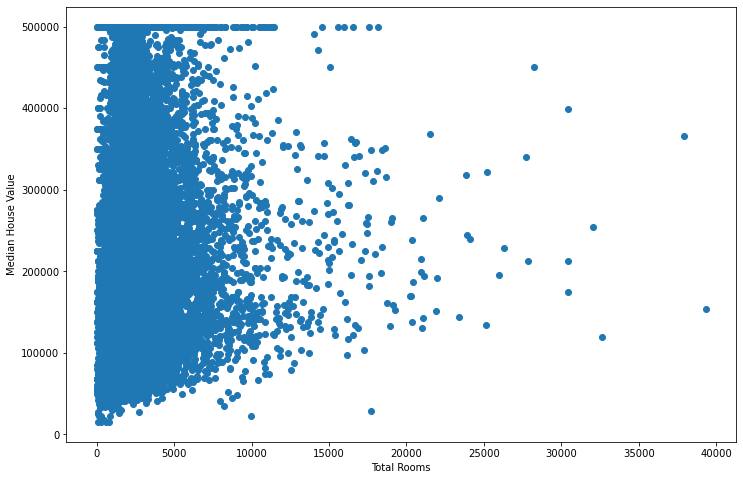

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data.total_rooms, housing_data.median_house_value)

plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")

Text(0, 0.5, 'Median House Value')

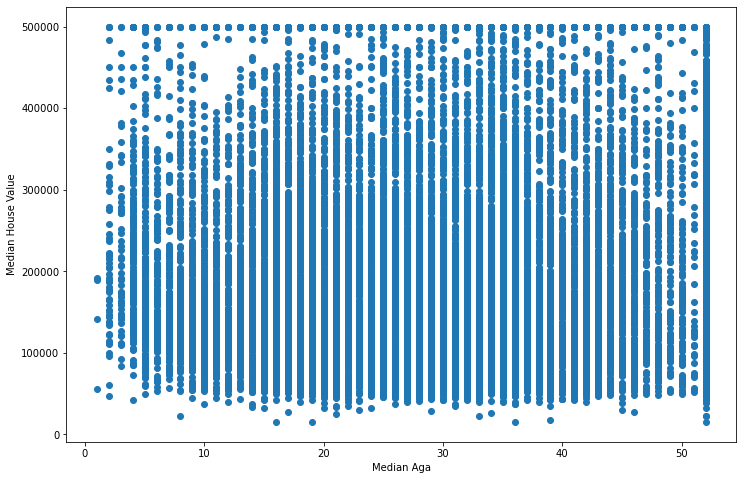

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data.housing_median_age, housing_data.median_house_value)

plt.xlabel("Median Aga")
plt.ylabel("Median House Value")

Text(0, 0.5, 'Median House Value')

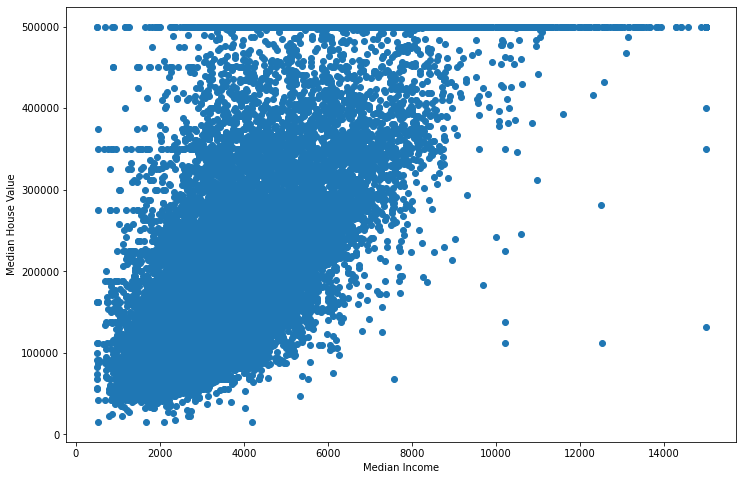

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data.median_income * 1000, housing_data.median_house_value)

plt.xlabel("Median Income")
plt.ylabel("Median House Value")

In [39]:
housing_data_corr = housing_data.corr()
display(housing_data_corr)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


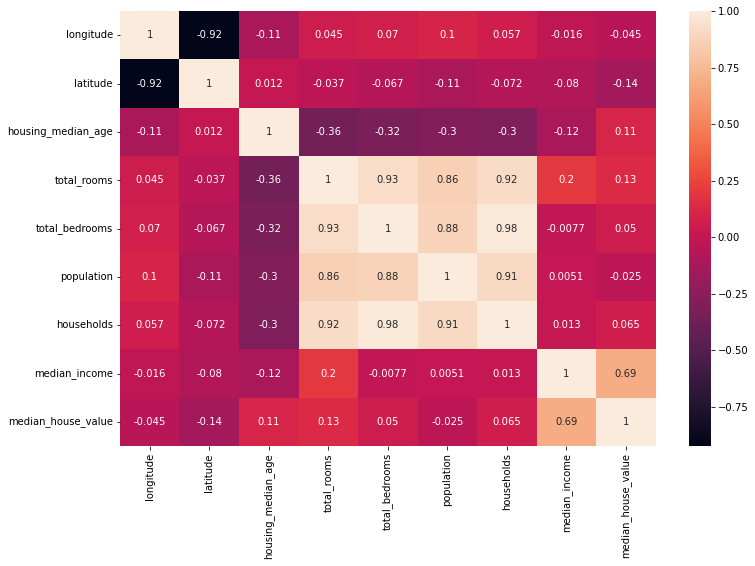

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(housing_data_corr, annot=True);

In [41]:
housing_data.loc[housing_data.median_house_value == 500001].count()


longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [42]:
housing_data = housing_data.drop(
    housing_data.loc[housing_data.median_house_value == 500001].index
)

In [43]:
housing_data.shape

(19475, 10)

In [44]:
housing_data = pd.get_dummies(housing_data, columns=["ocean_proximity"])

In [45]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [46]:
X = housing_data.drop("median_house_value", axis=1) # features
y = housing_data.median_house_value # targets

In [47]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15580, 13) (3895, 13) (15580,) (3895,)


In [54]:
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)

In [55]:
print("Training score: ", linear_model.score(X_train, y_train))

Training score:  0.6117601819146371


In [56]:
predictors = X_train.columns

In [57]:
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

ocean_proximity_INLAND        -25443.806751
longitude                     -24931.667941
latitude                      -22696.458377
population                       -30.481185
total_rooms                       -7.591896
households                        40.793248
total_bedrooms                    97.175465
housing_median_age               942.457067
ocean_proximity_NEAR BAY        5108.506210
ocean_proximity_<1H OCEAN      13058.842109
ocean_proximity_NEAR OCEAN     17464.227203
median_income                  38521.710046
ocean_proximity_ISLAND        178183.532437
dtype: float64


In [58]:
y_pred = linear_model.predict(X_test)

In [59]:
df_pred_actual = pd.DataFrame({"predicted": y_pred, "actual": y_test})

In [60]:
df_pred_actual.head()

,predicted,actual
14897,132328.691406,96200.0
14605,235315.996032,178700.0
2353,85578.407024,60600.0
11818,165573.151033,191900.0
2881,67306.444591,51000.0


In [63]:
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.6172937812307566


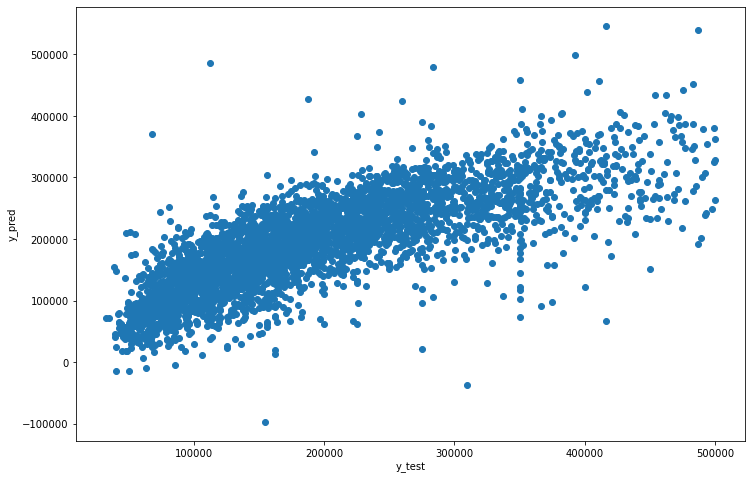

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [68]:
df_pred_actual_sample.head()

,index,predicted,actual
0,20611,46197.482967,47000.0
1,7851,159807.632501,148300.0
2,10910,80261.889291,170800.0
3,16819,252284.304532,251200.0
4,8699,285308.999462,279600.0


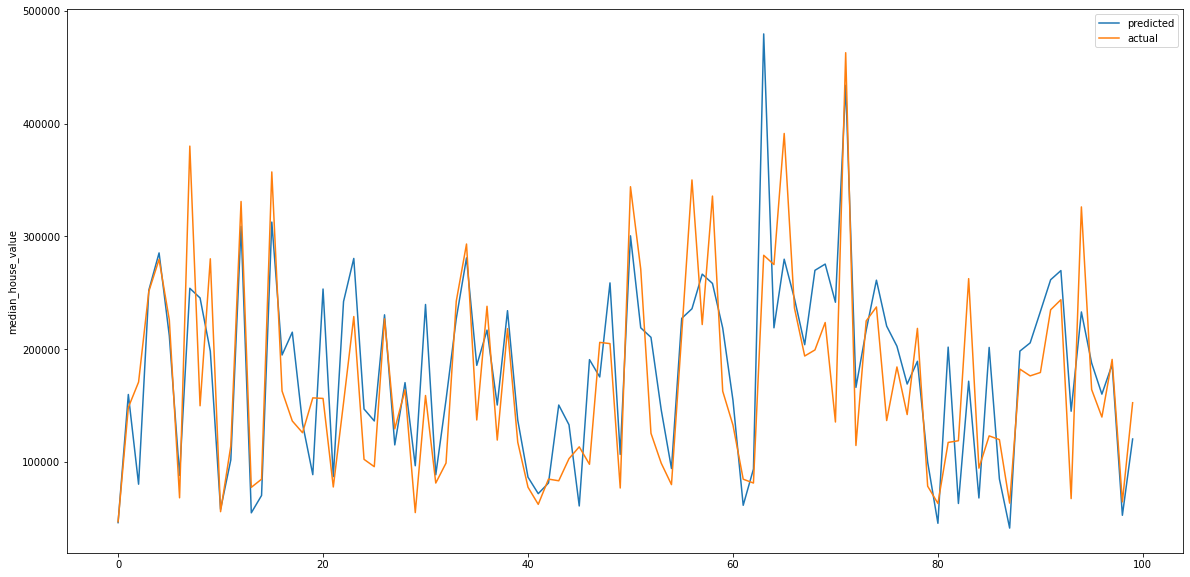

In [73]:
plt.figure(figsize=(20, 10))

plt.plot(df_pred_actual_sample["predicted"], label="predicted")
plt.plot(df_pred_actual_sample["actual"], label="actual")

plt.ylabel('median_house_value')
plt.legend()
plt.show()